**CSE-221710304026-K.vijayalakshmi**

In [44]:
import numpy as np
import pandas as pd
from keras.datasets.mnist import load_data
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

(60000, 28, 28)
(10000, 28, 28)


In [46]:
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [6]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

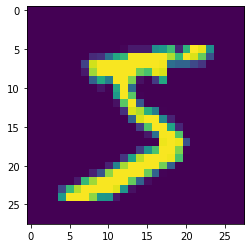

In [7]:
plt.imshow(train_digits[0])

In [47]:
samp=np.random.randint(train_digits.shape[0],size=16)
samp

array([48235,  9815, 32483, 13008,  1593, 31268, 18392, 26951, 21326,
       57205, 49126, 18500, 40745, 24850, 36738, 17256])

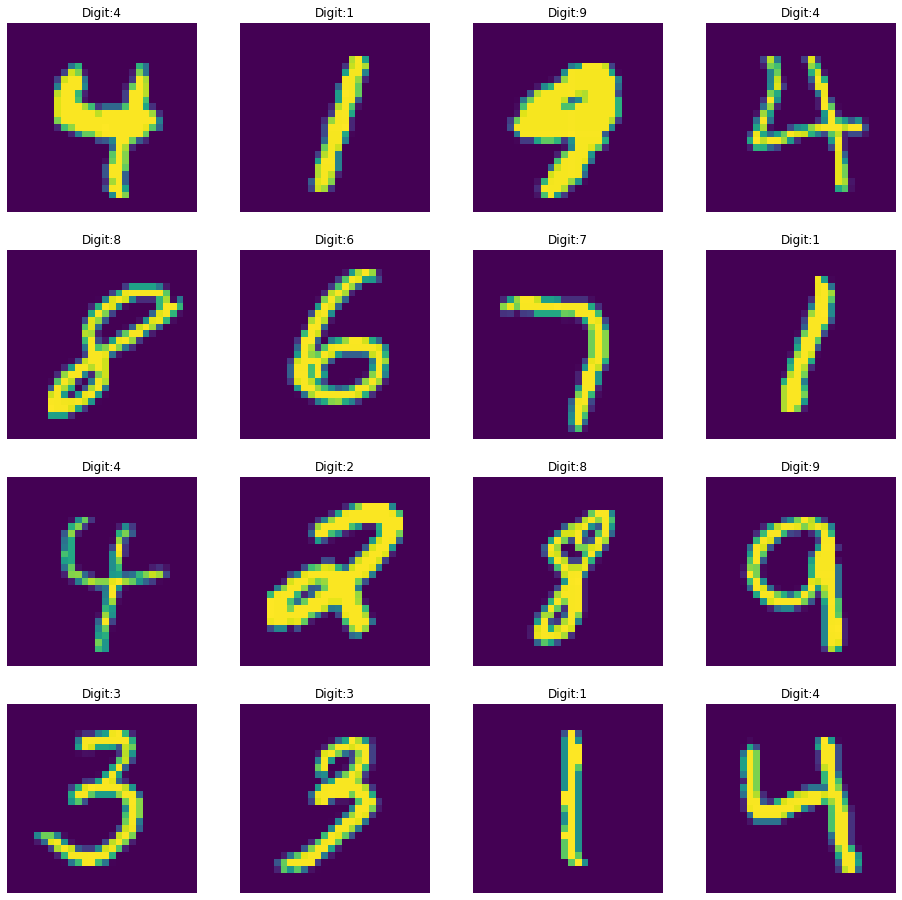

In [48]:
plt.figure(figsize=(16,16))
j=1
for i in samp:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j=j+1

In [49]:
train_digits[0][5:10,22:25]

array([[247, 127,   0],
       [195,  64,   0],
       [ 39,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [50]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [51]:
from keras.utils import to_categorical

In [52]:
train_labels_cat = to_categorical(train_labels)

In [53]:
test_labels_cat=to_categorical(test_labels)

In [54]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [55]:
test_labels_cat = to_categorical(test_labels)
test_labels_cat[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


In [57]:
## import the methods required
from keras.models import Sequential
from keras.layers import Dense,Flatten

**Model-1**

In [58]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [59]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [60]:
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 133us/step - loss: 0.2532 - accuracy: 0.9212 - val_loss: 0.1396 - val_accuracy: 0.9588
Epoch 2/5
54000/54000 [==============================] - 7s 126us/step - loss: 0.1123 - accuracy: 0.9648 - val_loss: 0.1129 - val_accuracy: 0.9655
Epoch 3/5
54000/54000 [==============================] - 7s 123us/step - loss: 0.0814 - accuracy: 0.9748 - val_loss: 0.0973 - val_accuracy: 0.9728
Epoch 4/5
54000/54000 [==============================] - 7s 124us/step - loss: 0.0635 - accuracy: 0.9800 - val_loss: 0.1186 - val_accuracy: 0.9685
Epoch 5/5
54000/54000 [==============================] - 7s 124us/step - loss: 0.0557 - accuracy: 0.9825 - val_loss: 0.0949 - val_accuracy: 0.9750


In [61]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 33us/step


[0.08658721077719238, 0.9749000072479248]

In [62]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [63]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.6606842e-07, 1.8627583e-05, 5.6391262e-05, 2.1285423e-05,
        1.6719567e-07, 6.3774536e-08, 6.4051919e-10, 9.9984467e-01,
        6.4791934e-06, 5.1674495e-05]], dtype=float32)

In [64]:
model.predict(test_digits_sc[:10])

array([[5.6607166e-07, 1.8627601e-05, 5.6391425e-05, 2.1285503e-05,
        1.6719615e-07, 6.3774777e-08, 6.4052164e-10, 9.9984467e-01,
        6.4792184e-06, 5.1674640e-05],
       [3.3039552e-08, 3.1790130e-08, 9.9999869e-01, 1.0888754e-06,
        3.4923620e-08, 3.3505065e-10, 2.7026725e-10, 6.3798097e-08,
        3.3269863e-08, 2.2520939e-10],
       [5.5698956e-07, 9.9985814e-01, 1.5944706e-05, 6.5076556e-08,
        1.6377141e-06, 3.5178138e-07, 3.7424513e-07, 4.6418278e-05,
        7.5313044e-05, 1.1809238e-06],
       [9.9999726e-01, 6.5073710e-11, 6.2998998e-07, 1.1312140e-09,
        4.9928950e-08, 5.1081408e-08, 1.2433901e-07, 4.2797740e-08,
        4.0176604e-09, 1.8455752e-06],
       [6.7831341e-09, 2.4167045e-06, 3.8599444e-07, 1.6370193e-09,
        9.9978238e-01, 3.7569467e-07, 8.8306273e-08, 1.2779395e-05,
        3.6919275e-07, 2.0118609e-04],
       [8.6466514e-09, 9.9999213e-01, 3.6507214e-07, 4.5051141e-10,
        8.2895959e-08, 1.6990616e-09, 1.9729807e-09, 5.22

In [65]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [66]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.6606842e-07, 1.8627583e-05, 5.6391262e-05, 2.1285423e-05,
        1.6719567e-07, 6.3774536e-08, 6.4051919e-10, 9.9984467e-01,
        6.4791934e-06, 5.1674495e-05]], dtype=float32)

In [67]:
history.history

{'accuracy': [0.9212222, 0.9647963, 0.9747593, 0.9800185, 0.98246294],
 'loss': [0.25315626379268036,
  0.11230705917502443,
  0.08144871127550249,
  0.06350834652975512,
  0.055703894632032],
 'val_accuracy': [0.9588333368301392,
  0.965499997138977,
  0.9728333353996277,
  0.968500018119812,
  0.9750000238418579],
 'val_loss': [0.13955653428286313,
  0.11285990818838279,
  0.09733347025327385,
  0.11860952638167267,
  0.09486357819770153]}

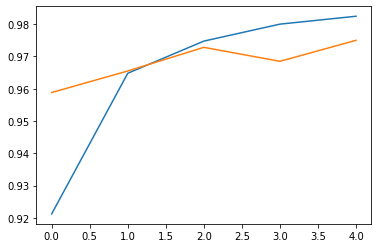

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

**Model-2**

In [69]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [70]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [71]:
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 8s 143us/step - loss: 0.2591 - accuracy: 0.9206 - val_loss: 0.1263 - val_accuracy: 0.9637
Epoch 2/5
54000/54000 [==============================] - 7s 139us/step - loss: 0.1102 - accuracy: 0.9677 - val_loss: 0.1162 - val_accuracy: 0.9675
Epoch 3/5
54000/54000 [==============================] - 7s 138us/step - loss: 0.0782 - accuracy: 0.9759 - val_loss: 0.1423 - val_accuracy: 0.9627
Epoch 4/5
54000/54000 [==============================] - 7s 137us/step - loss: 0.0629 - accuracy: 0.9807 - val_loss: 0.1062 - val_accuracy: 0.9732
Epoch 5/5
54000/54000 [==============================] - 8s 140us/step - loss: 0.0498 - accuracy: 0.9848 - val_loss: 0.0981 - val_accuracy: 0.9760


In [72]:
model1.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 33us/step


[0.07509204852688127, 0.9789000153541565]

In [73]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [74]:
model1.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[4.84813017e-06, 8.45978138e-06, 3.38934187e-05, 1.34584308e-03,
        1.13623828e-05, 5.07061213e-06, 5.09690157e-09, 9.99111056e-01,
        7.88825673e-06, 1.21637195e-05]], dtype=float32)

In [75]:
model1.predict(test_digits_sc[:10])

array([[4.84813017e-06, 8.45978138e-06, 3.38934515e-05, 1.34581327e-03,
        1.13623719e-05, 5.07061213e-06, 5.09690157e-09, 9.99111056e-01,
        7.88826401e-06, 1.21637204e-05],
       [1.82890538e-08, 3.12293942e-08, 9.99957442e-01, 5.64663515e-06,
        8.83617233e-08, 3.08968822e-07, 7.38671559e-08, 1.60672457e-07,
        2.49958827e-08, 6.53722410e-10],
       [5.87016602e-10, 9.99722600e-01, 7.71257930e-07, 4.70657739e-07,
        9.03797286e-08, 6.27090485e-05, 1.80124300e-06, 7.33123073e-08,
        8.07547906e-07, 3.03086587e-08],
       [9.99965847e-01, 2.73672094e-06, 7.28713931e-05, 8.62286834e-06,
        1.11812660e-05, 2.00277299e-07, 1.81769956e-05, 2.83224813e-06,
        7.57545649e-06, 3.86536121e-04],
       [1.88406135e-09, 3.88904311e-07, 3.47454687e-08, 2.41449470e-07,
        9.99965787e-01, 1.47884230e-05, 1.05395145e-06, 1.34212939e-07,
        2.06690359e-07, 7.11292028e-04],
       [1.09102371e-11, 9.99969244e-01, 1.31865603e-08, 1.20189405e-08,
   

In [76]:
model1.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [77]:
model1.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[4.84813017e-06, 8.45978138e-06, 3.38934187e-05, 1.34584308e-03,
        1.13623828e-05, 5.07061213e-06, 5.09690157e-09, 9.99111056e-01,
        7.88825673e-06, 1.21637195e-05]], dtype=float32)

In [78]:
history.history

{'accuracy': [0.9205926, 0.96772224, 0.97594446, 0.9807407, 0.98477775],
 'loss': [0.25914472299648655,
  0.11020788119084857,
  0.07818827170826909,
  0.06293776837743267,
  0.04979006572811718],
 'val_accuracy': [0.9636666774749756,
  0.9674999713897705,
  0.9626666903495789,
  0.9731666445732117,
  0.9760000109672546],
 'val_loss': [0.1263028938124577,
  0.11618982141713301,
  0.1422991184766094,
  0.10616270941868425,
  0.09813453738950192]}

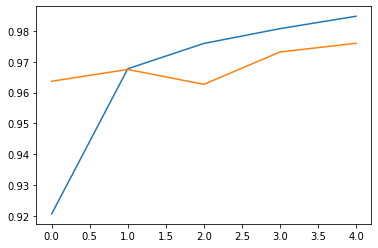

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

The accuarcy and Val_Accuracy of the model 1 is :[0.08658721077719238, 0.9749000072479248]

The accuarcy andVal_Accuracy of the model 2 is :[0.07509204852688127, 0.9789000153541565]

Hence model 1 is best than model 2